The Dataset "Black friday" was used in this test task. 
[Here is the link of the dataset.](https://www.kaggle.com/mehdidag/black-friday)


In [8]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
data = pd.read_csv('BlackFriday.csv')

In [112]:
data.shape

(537577, 12)

In [113]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [114]:
#As in the "purchase" column the price in thousands so it can't be Dollars so we will consider it as a type of credits
#The columns of Product_categories states the product in 3 levels of categories like Product_category_1 for Electronics and Product_category_2 for Cameras.
#Quantity of the items purchased has not been specified in the Data that's why the total purchase is not making much sense.

In [115]:
data.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [116]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [117]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [118]:
data.fillna(value=0,inplace=True)

In [119]:
data.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

In [120]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [122]:
data['Product_Category_2'] = data['Product_Category_2'].astype(int)
data['Product_Category_3'] = data['Product_Category_3'].astype(int)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(7), object(5)
memory usage: 49.2+ MB


In [124]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2,0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8,17,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15,0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16,0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0,0,7871


In [125]:
data["User_ID"] = data["User_ID"] - 1000000

In [126]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,2,P00285442,M,55+,16,C,4+,0,8,0,0,7969
5,3,P00193542,M,26-35,15,A,3,0,1,2,0,15227
6,4,P00184942,M,46-50,7,B,2,1,1,8,17,19215
7,4,P00346142,M,46-50,7,B,2,1,1,15,0,15854
8,4,P0097242,M,46-50,7,B,2,1,1,16,0,15686
9,5,P00274942,M,26-35,20,A,1,1,8,0,0,7871


In [127]:
#We will see which gender is responsible for more purchase so multiple purchases by same people will be considered

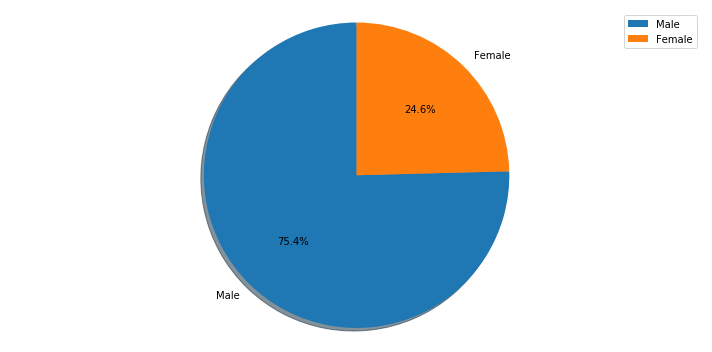

In [128]:
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(data['Gender'].value_counts(),labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [129]:
#This is showing that 75.4% of purchases were made by men. There is a possibility that the purchase was made by a husband/Father but with the existing Data it is not possible to confirm it for now.

In [130]:
#We will see which age group is responsible for more purchase so multiple purchases by same person will be considered

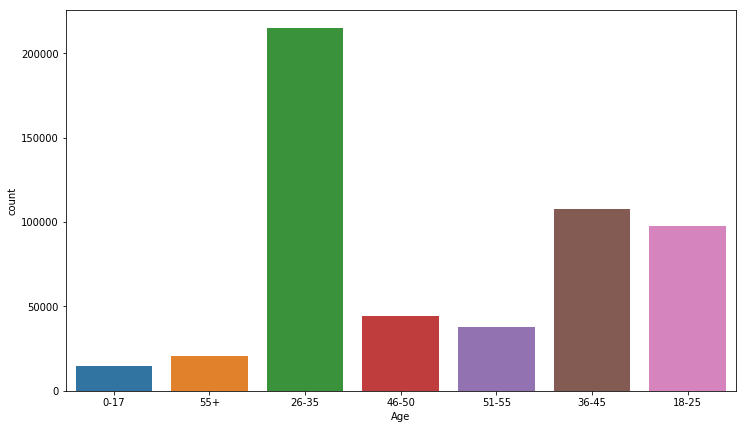

In [131]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(data['Age'])

In [132]:
#This shows that people in the Age group of 26-35 did the most number of purchases

In [133]:
#We will see in which city most of the purchases are being done

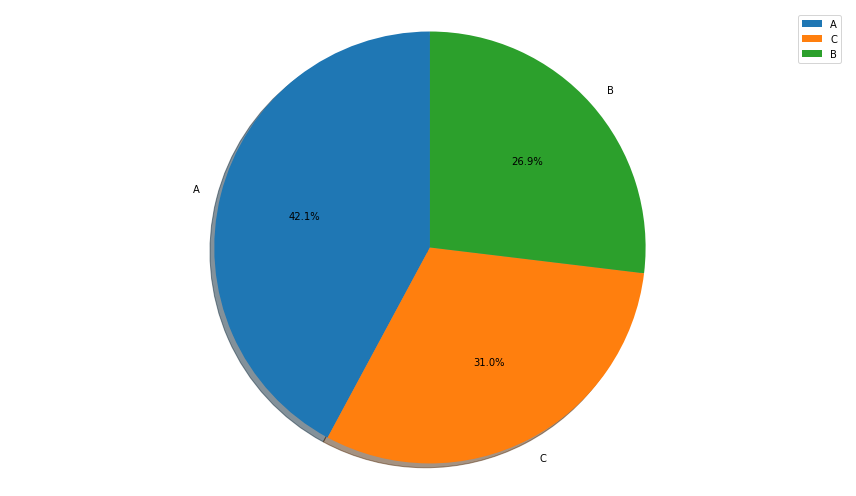

In [134]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['City_Category'].value_counts(), labels=data['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [135]:
#City A has recorded the most number of purchases

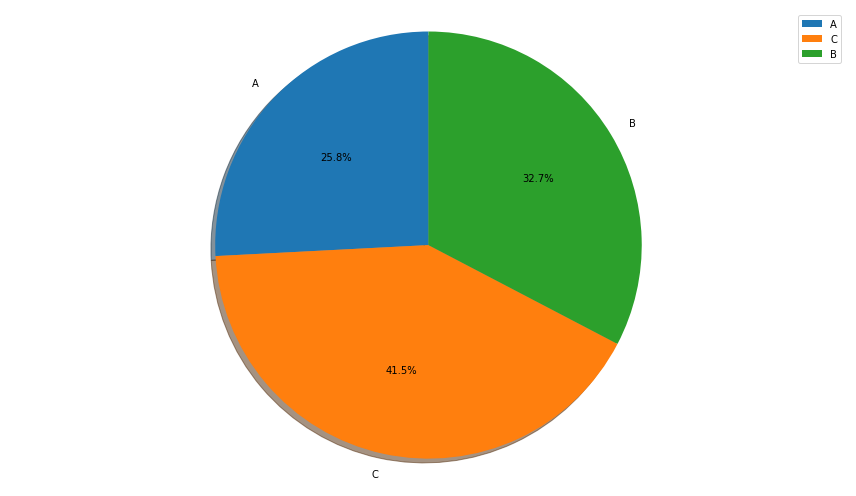

In [162]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data.groupby('City_Category')['Purchase'].sum(), labels=data['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
#This shows that although Most of the purchase are made by people from city A, City C is a major source of Revenue

In [136]:
#We will analyze the marital status of the costumers

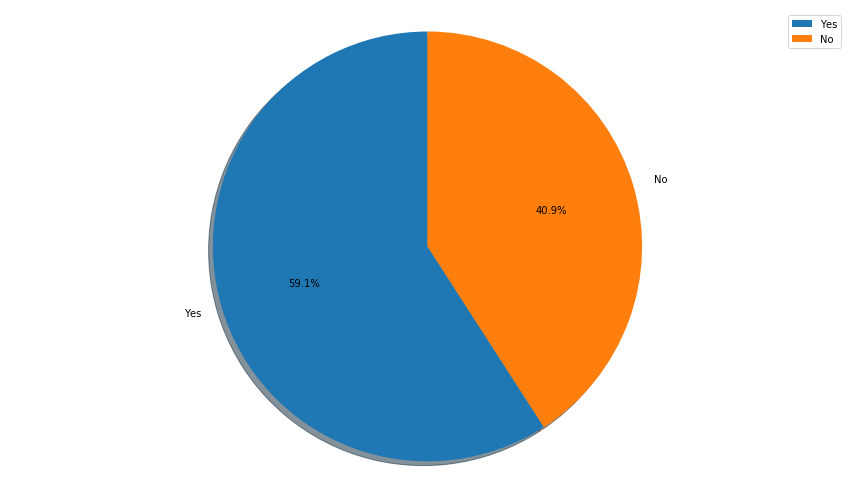

In [137]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['Marital_Status'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [138]:
#It shows that almost 60% of the customers are married. There's a high chance that Family targeted products might be more profitable.

In [139]:
#Now we will see if the customers were staying in the city for a long time or came there recently.

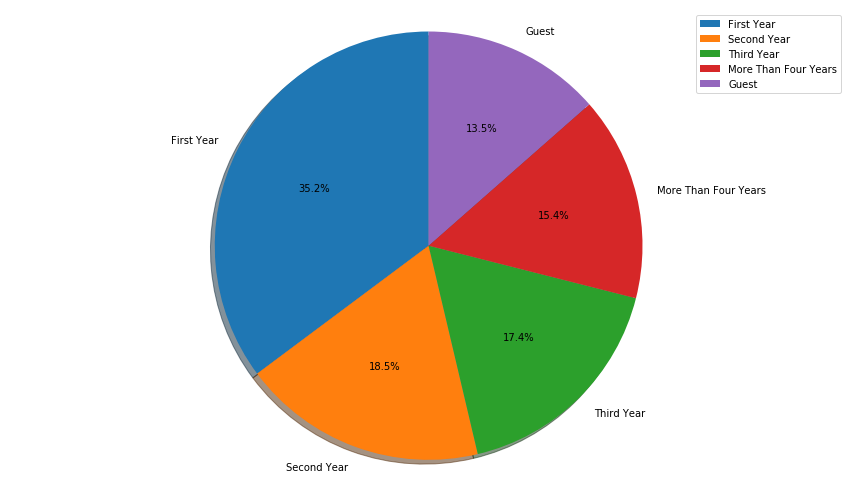

In [158]:
labels=['First Year','Second Year','Third Year','More Than Four Years','Guest']
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['Stay_In_Current_City_Years'].value_counts(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [141]:
#This shows that the new residents in the city did most number of purchases.

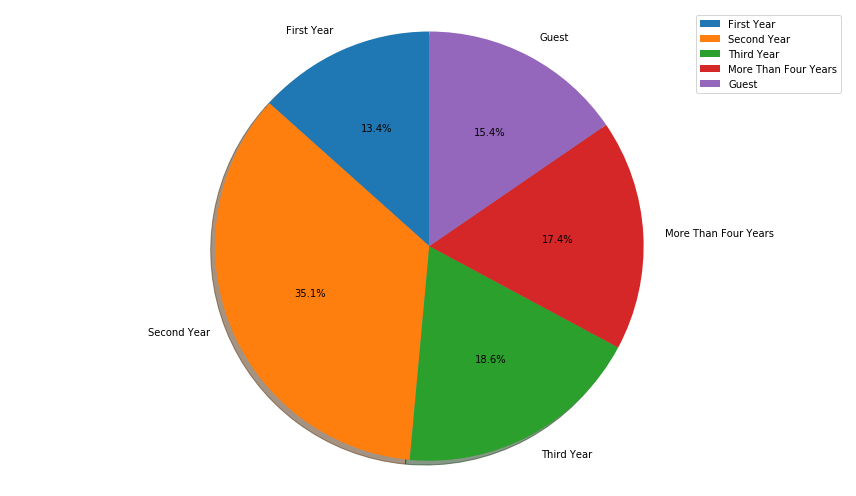

In [159]:
labels=['First Year','Second Year','Third Year','More Than Four Years','Guest']
explode = (0.1, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data.groupby('Stay_In_Current_City_Years')['Purchase'].sum(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
#This chart shows that the although the new residents did more purchase, the residents which came 2 years ago are the reason for most of the revenue.

In [142]:
#Now we will se the effect of type of population on purchase.

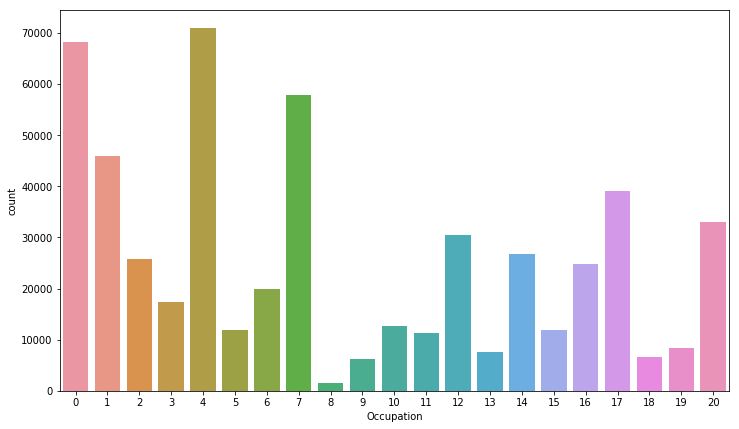

In [143]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(data['Occupation'])

In [144]:
#This Shows that people with occupation 0 and 4 did the most purchases

In [145]:
#Now, we will check the most important factor which are the products

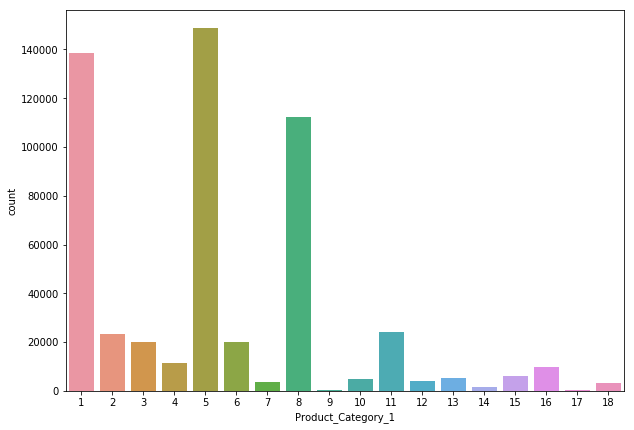

In [146]:
fig1, ax1 = plt.subplots(figsize=(10,7))
sns.countplot(data['Product_Category_1'])

In [147]:
data2 = data

In [148]:
data2 = data2[data2.Product_Category_2 != 0]

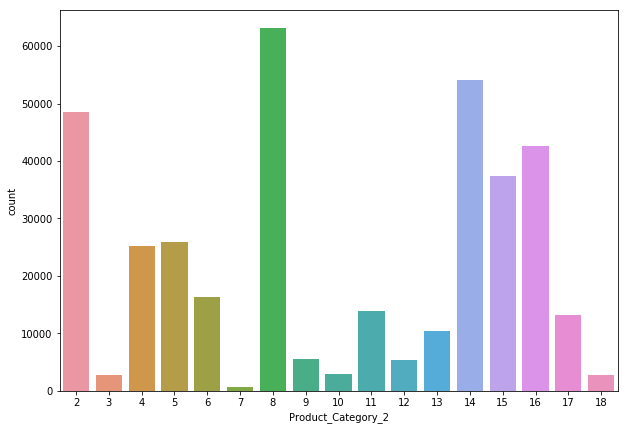

In [149]:
fig1, ax1 = plt.subplots(figsize=(10,7))
sns.countplot(data2['Product_Category_2'])

In [150]:
data3 = data
data3 = data3[data3.Product_Category_3 != 0]

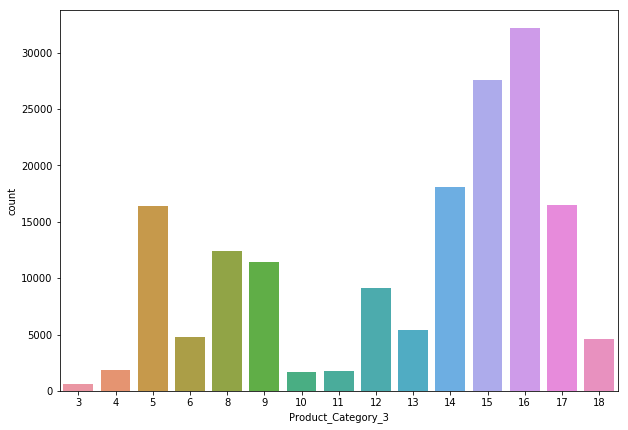

In [151]:
fig1, ax1 = plt.subplots(figsize=(10,7))
sns.countplot(data3['Product_Category_3'])

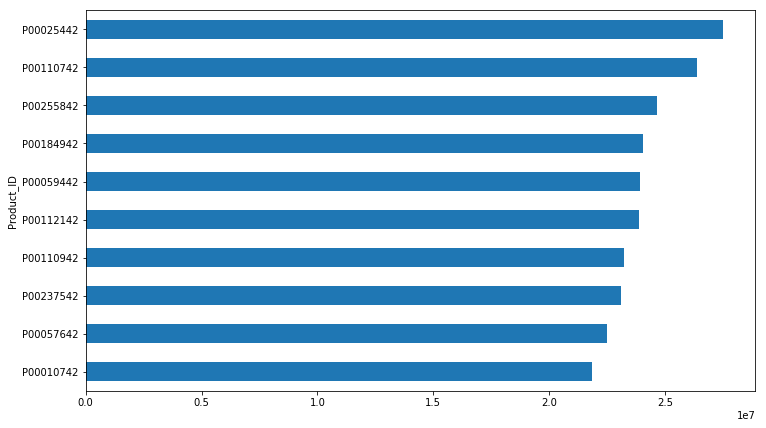

In [152]:
fig1, ax1 = plt.subplots(figsize=(12,7))
data.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot('barh')

In [153]:
#This is the list of top 10 products which made the most revenue

In [ ]:
"""
So, the observations made in this data are :-
1. That 75.4% of purchases were made by men.
2. That people in the Age group of 26-35 did the most number of purchases
3. That although Most of the purchase are made by people from city A,
   City C is a major source of Revenue
4. That almost 60% of the customers are married. 
5. That the although the new residents did more purchase, the
   residents which came 2 years ago are the reason for most of the revenue.
6. That people with occupation 0 and 4 did the most purchases
7. The list of top 10 products which made the most revenue
"""

In [ ]:
"""
The conclusion from this Analysis is that :-
1. If the products are targeted more towards families and newly married couples,
   there are high chances of increase in Revenue.
2. There has been big changes in the past 2 years because of the highly positive
   response by the new residents(1-2 years).
3. The people with occupation 0  and 4 did the most purchase which gives some idea
   about their purchasing power. This information can be used as if these occupation
   is engineers and lawyers, new products useful to them can be introduced.
4. In the end the list of top 10 products bought can be used to set the discount 
   on the products for the next black friday sale.
"""